In [1]:
import pandas as pd

In [17]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [18]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [19]:
# df.isnull().any() # to see if an attribute has Null value or not
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


See people died so can't figure out age or deck number so it is missing data at random but embark_town has no relationship with anything, it can be an error [Missng completely at random]

One way to handle missing value is delete those data points but in that case we can loose some data

In [20]:
df.shape

(891, 15)

In [21]:
df.dropna().shape

(182, 15)

We can see we lost 891-182 = 609 datapoints

**Column Wise Drop**

In [22]:
df.dropna(axis=1) # it will drop all attributes that has null values

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


**Imputation Techniques** How we can handle missing values

**1. Mean Value Imputation** replace attributes missing values with mean of that attribute

<Axes: xlabel='age', ylabel='Count'>

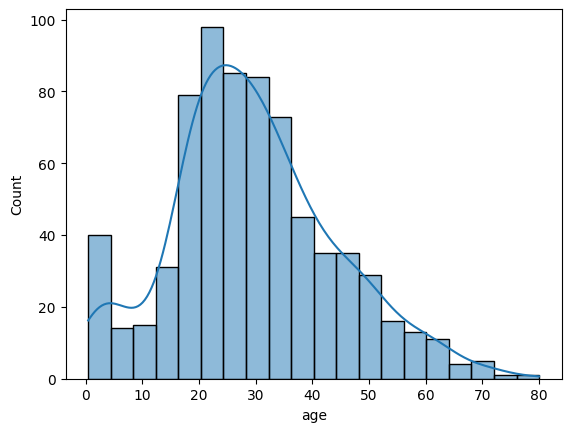

In [23]:
sns.histplot(df['age'],kde=True)

In [26]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [30]:
# df['age_mean']

<Axes: xlabel='age_mean', ylabel='Count'>

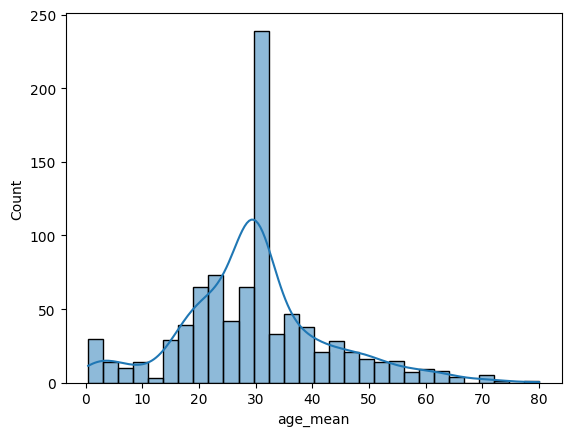

In [29]:
sns.histplot(df['age_mean'],kde=True)

We replace Null values with means when our data follows Normal Distribution

**2. Median Imputation** when data is left skewed or left skewed then outliers will be there so we can replace missing values with median

In [31]:
df['age_median'] = df['age'].fillna(df['age'].mean())

<Axes: xlabel='age_median', ylabel='Count'>

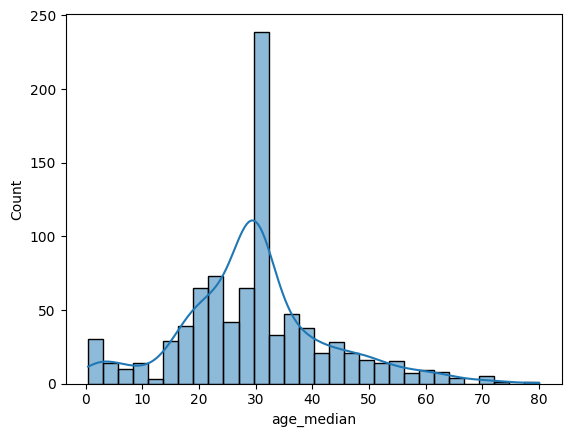

In [32]:
sns.histplot(df['age_median'],kde=True)

**3. Mode Imputation** Can be used with Categorical Values

In [33]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [35]:
df['embark_town'].unique() #Find all unique values in that attribute

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

We can replace null with any of the values
 ['Southampton', 'Cherbourg', 'Queenstown']



In [44]:
# df['embarked'].notna() # this will give us all vlaues that are not Null
# df[df['embarked'].notna()] #this will give the dataframe by skipping Null values in embark
# df[df['embarked'].notna()]['embarked'] # give us embarked column
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [48]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)
df['embarked_mode'].isnull().any()

False

**Random Sampling** also we can use where we can replace null value with random values from that attribute.
